In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
df= pd.read_csv('spam_utf8.csv')

In [4]:
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


# 1.Data cleaning

In [5]:
df.shape

(5572, 5)

In [6]:
df_clean= pd.read_csv('cleaned_spam.csv')

In [7]:
df_clean

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5164,spam,This is the 2nd time we have tried 2 contact u...
5165,ham,Will Ì_ b going to esplanade fr home?
5166,ham,"Pity, * was in mood for that. So...any other s..."
5167,ham,The guy did some bitching but I acted like i'd...


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [9]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace = True)

In [10]:
df.sample(5)

,v1,v2
2748,ham,Send his number and give reply tomorrow mornin...
2779,ham,Well I might not come then...
2632,ham,I WILL CAL YOU SIR. In meeting
2810,ham,Thinkin about someone is all good. No drugs fo...
5435,ham,I'm wif him now buying tix lar...


In [11]:
df.rename(columns={'v1':'target','v2':'text'},inplace=True)

In [12]:
df

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [13]:
# changing the label of the target columns

In [14]:
from sklearn.preprocessing import LabelEncoder

In [15]:
encoder= LabelEncoder()

In [16]:
df['target']=encoder.fit_transform(df['target'])

In [17]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [18]:
# check for missing values

In [19]:
df.isnull().sum()

target    0
text      0
dtype: int64

In [20]:
# check for duplicates

In [21]:
df.duplicated().sum()

403

In [22]:
df=df.drop_duplicates(keep='first')

In [23]:
df.shape

(5169, 2)

# EDA

In [24]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [25]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

In [26]:
import matplotlib.pyplot as plt

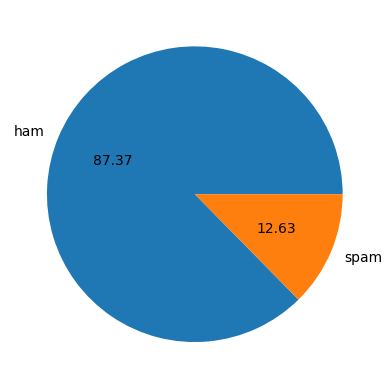

In [27]:
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct='%0.2f')
plt.show()

In [28]:
!pip install nltk

In [29]:
import nltk

In [30]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\Prosenjit
[nltk_data]     Mondal\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [31]:
df['num_character']=df['text'].apply(len)

C:\Users\Prosenjit Mondal\AppData\Local\Temp\ipykernel_17156\1812184597.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_character']=df['text'].apply(len)


In [32]:
df

,target,text,num_character
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61
...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161
5568,0,Will Ì_ b going to esplanade fr home?,37
5569,0,"Pity, * was in mood for that. So...any other s...",57
5570,0,The guy did some bitching but I acted like i'd...,125


In [33]:
df['num_words']=df['text'].apply(lambda x: len(nltk.word_tokenize(x)))

C:\Users\Prosenjit Mondal\AppData\Local\Temp\ipykernel_17156\3771813659.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_words']=df['text'].apply(lambda x: len(nltk.word_tokenize(x)))


In [34]:
df

,target,text,num_character,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15
...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35
5568,0,Will Ì_ b going to esplanade fr home?,37,9
5569,0,"Pity, * was in mood for that. So...any other s...",57,15
5570,0,The guy did some bitching but I acted like i'd...,125,27


In [35]:
df['num_sentences']=df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))

C:\Users\Prosenjit Mondal\AppData\Local\Temp\ipykernel_17156\1801296511.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_sentences']=df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))


In [36]:
df

,target,text,num_character,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1
...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,4
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2
5570,0,The guy did some bitching but I acted like i'd...,125,27,1


In [37]:
df[['num_character','num_words','num_sentences']].describe()

,num_character,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [38]:
# ham
df[df['target']==0][['num_character','num_words','num_sentences']].describe()

,num_character,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [39]:
df[df['target']==1][['num_character','num_words','num_sentences']].describe()

,num_character,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [40]:
import seaborn as sns

<Axes: xlabel='num_character', ylabel='Count'>

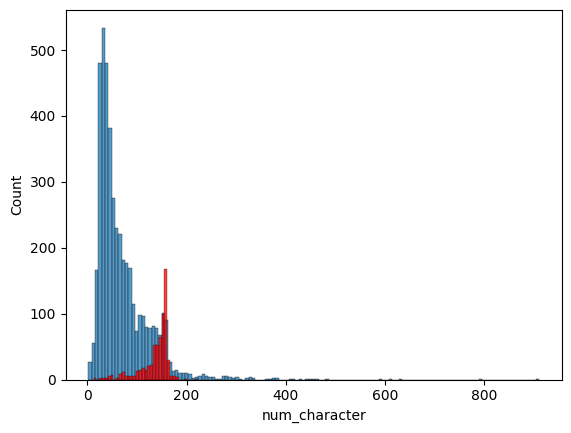

In [41]:
# plot on num_character
sns.histplot(df[df['target']==0]['num_character'])
sns.histplot(df[df['target']==1]['num_character'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

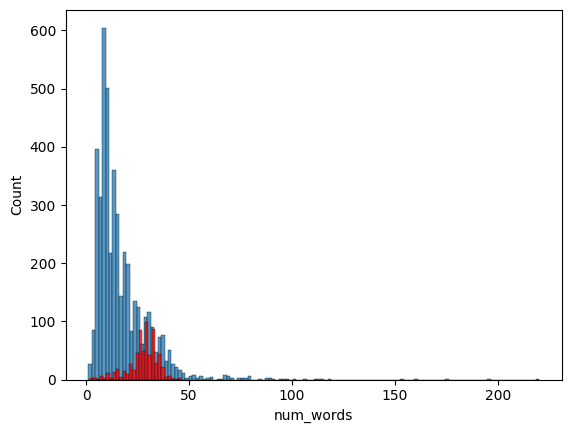

In [42]:
# plot on num_word
sns.histplot(df[df['target']==0]['num_words'])
sns.histplot(df[df['target']==1]['num_words'],color='red')

In [43]:
df

,target,text,num_character,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1
...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,4
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2
5570,0,The guy did some bitching but I acted like i'd...,125,27,1


C:\Users\Prosenjit Mondal\anaconda3\envs\spamclassifier\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


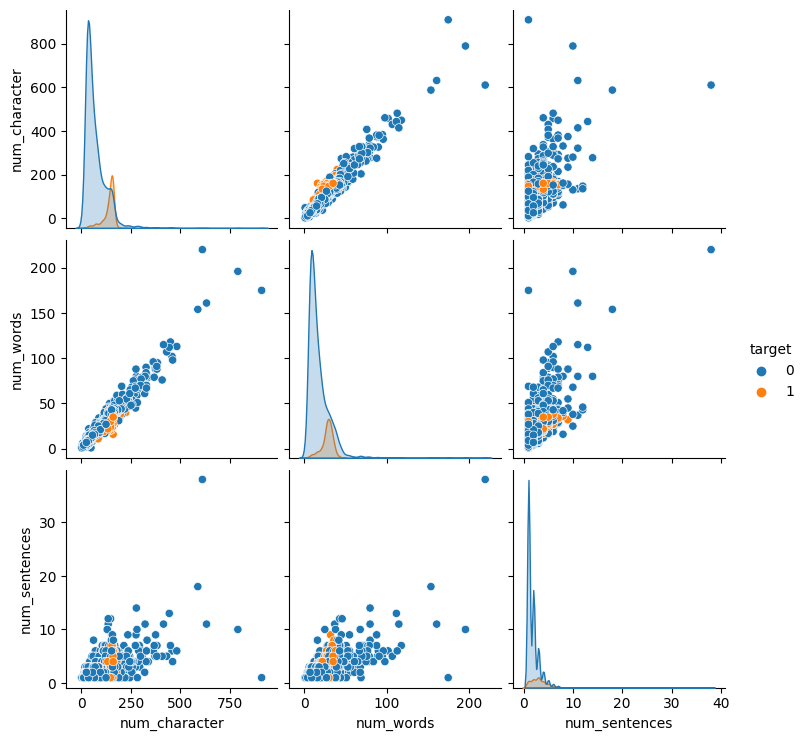

In [44]:
sns.pairplot(df,hue='target')

<Axes: >

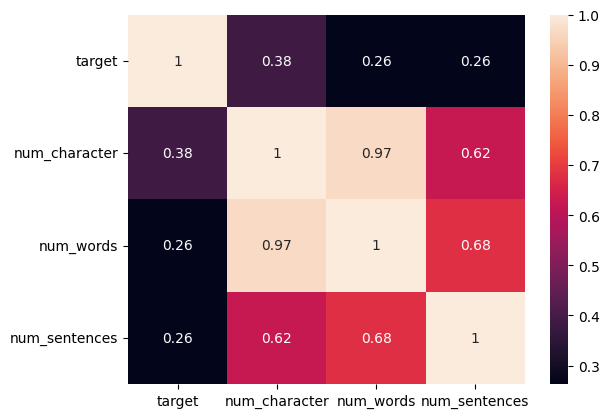

In [45]:
sns.heatmap(df[['target','num_character','num_words','num_sentences']].corr(),annot=True)

## 3. Data Preprocessing 
#### lower case
#### Tokenization --> converting sentences to words
#### Removing special characters
#### Removing stop words and punctuation -->is, the , and 
#### Stemming --> dance,dancing, dances --->dance

In [46]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\Prosenjit
[nltk_data]     Mondal\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [47]:
from nltk.corpus import stopwords
import string


In [48]:
# stemming
from nltk.stem.porter import PorterStemmer
ps= PorterStemmer()


In [49]:

def transform_text(text):
    text= text.lower()    # lower case   
    text=nltk.word_tokenize(text)   #tokenize
    y=[]
    for i in text:           # removing special char
        if i.isalnum():
            y.append(i)
        
    text= y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    text=y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
        
    return " ".join(y)

In [50]:
df['transformed_text']=df['text'].apply(transform_text)

C:\Users\Prosenjit Mondal\AppData\Local\Temp\ipykernel_17156\4139466366.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['transformed_text']=df['text'].apply(transform_text)


In [51]:
df.head()

,target,text,num_character,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


## generating word cloud

In [52]:
from wordcloud import WordCloud
wc= WordCloud(width=1000,height=1000,min_font_size=10,background_color='white')

In [53]:
# merging all the texts in spam category from all the rows 
whole_spam_text=df[df['target']==1]['transformed_text'].str.cat(sep=' ')

In [54]:
spam_wc=wc.generate(whole_spam_text)

Text(0.5, 1.0, 'spam wordcloud')

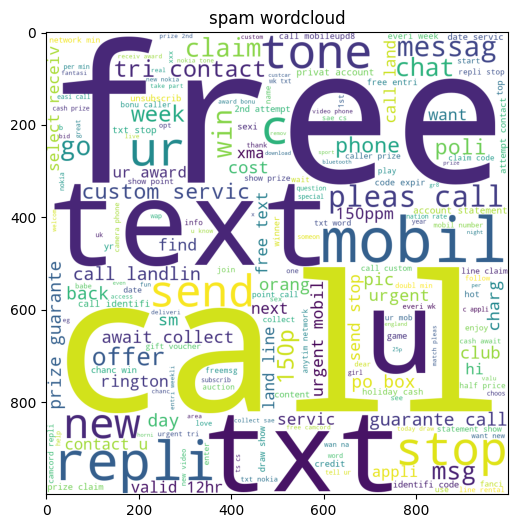

In [55]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)
plt.title('spam wordcloud')

In [56]:
# merging all the ham texts 
whole_ham_text=df[df['target']==0]['transformed_text'].str.cat(sep=' ')

In [57]:
ham_wc=wc.generate(whole_ham_text)

Text(0.5, 1.0, 'ham wordcloud')

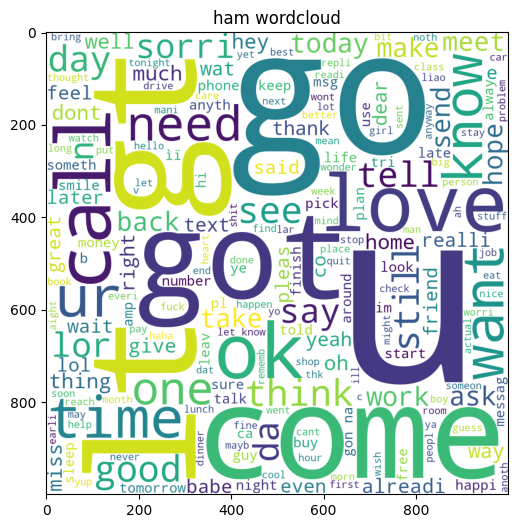

In [58]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)
plt.title('ham wordcloud')

In [59]:
# top 50 words which are frequently used in ham and in spam

In [60]:
df.head()

,target,text,num_character,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


### most common ham words

In [61]:
spam_corpus=[]
message=df[df['target']==1]['transformed_text'].tolist()
for msg in message:
    for i in msg.split():
        spam_corpus.append(i)

In [62]:
from collections import Counter

In [63]:
top_spam = pd.DataFrame(Counter(spam_corpus).most_common(30))
top_spam.head()

,0,1
0,call,320
1,free,191
2,2,155
3,txt,141
4,text,122


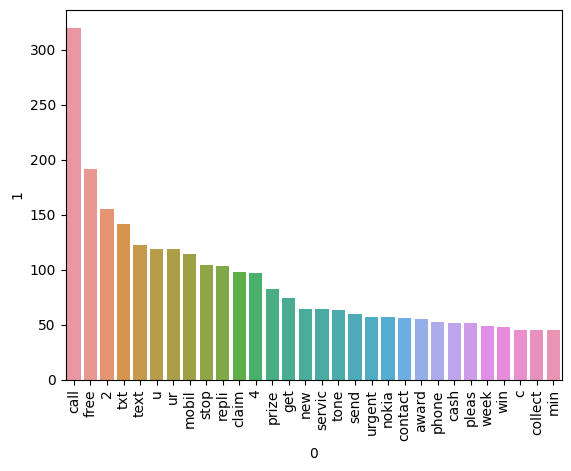

In [64]:
sns.barplot(x=top_spam[0],y=top_spam[1])
plt.xticks(rotation='vertical')
plt.show()

### most common ham words

In [65]:
ham_corpus=[]
for msg in df[df['target']==0]['transformed_text']:
    for i in msg.split():
        ham_corpus.append(i)

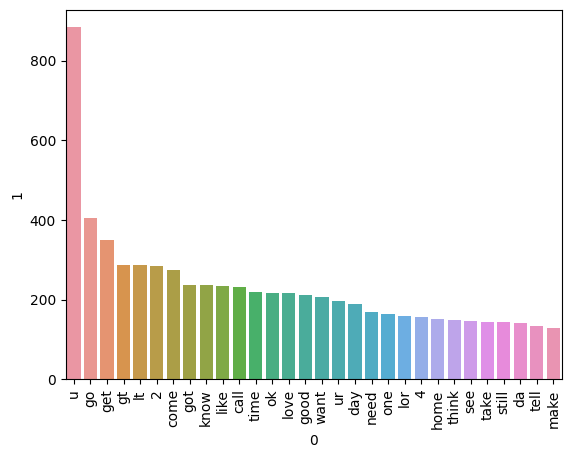

In [66]:
sns.barplot(x=pd.DataFrame(Counter(ham_corpus).most_common(30))[0],y=pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [69]:
df.head()

,target,text,num_character,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


# Model building

In [95]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv= CountVectorizer()
tfidf=TfidfVectorizer()

In [ ]:
# converting text to vectors
#1. bag of words

In [73]:
X= cv.fit_transform(df['transformed_text']).toarray()

In [76]:
X.shape

(5169, 6708)

In [77]:
y= df['target'].values

In [78]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [79]:
from sklearn.model_selection import train_test_split

In [80]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=2)

In [85]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [83]:
gnb=GaussianNB()
mnb= MultinomialNB()
bnb= BernoulliNB()

In [87]:
gnb.fit(X_train,y_train)
y_pred1= gnb.predict(X_test)
print('*****GaussianNB****')
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

*****GaussianNB****
0.8800773694390716
[[792 104]
 [ 20 118]]
0.5315315315315315


In [93]:
mnb.fit(X_train,y_train)
y_pred2= mnb.predict(X_test)
print('****MultinomialNB*****')
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

****MultinomialNB*****
0.9642166344294004
[[871  25]
 [ 12 126]]
0.8344370860927153


In [92]:
bnb.fit(X_train,y_train)
y_pred3= bnb.predict(X_test)
print('****BernoulliNB*****')
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

****BernoulliNB*****
0.9700193423597679
[[893   3]
 [ 28 110]]
0.9734513274336283


In [96]:
# converting text to vectors
#1. TfidfVectorizer

In [97]:
X=tfidf.fit_transform(df['transformed_text']).toarray()

In [98]:
X.shape

(5169, 6708)

In [99]:
y= df['target'].values

In [111]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=3)

In [112]:
gnb=GaussianNB()
mnb= MultinomialNB()
bnb= BernoulliNB()

In [113]:
gnb.fit(X_train,y_train)
y_pred1= gnb.predict(X_test)
print('*****GaussianNB****')
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

*****GaussianNB****
0.8646034816247582
[[773 121]
 [ 19 121]]
0.5


In [114]:
mnb.fit(X_train,y_train)
y_pred2= mnb.predict(X_test)
print('****MultinomialNB*****')
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

****MultinomialNB*****
0.9555125725338491
[[894   0]
 [ 46  94]]
1.0


In [115]:
bnb.fit(X_train,y_train)
y_pred3= bnb.predict(X_test)
print('****BernoulliNB*****')
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

****BernoulliNB*****
0.9690522243713733
[[892   2]
 [ 30 110]]
0.9821428571428571


In [ ]:
# final model -->tfidf-->mnb

## creating a pipeline

In [116]:
# step1: transforming text
#  step2: vectorize 
#  step3 : applying algorithms

In [117]:
import pickle

In [118]:
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'),)